<a href="https://colab.research.google.com/github/selmer512/BUAD651-198/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, get_file

%matplotlib inline

model_url = (
    "https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
    "/master/AIML_for_Business/model")

def build_model():
    model = models.Sequential(name='mnist_large')
    model.add(layers.Input(shape=(50 * 50,)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    model.fit(train_images_reshape, train_labels_cat, epochs=15, batch_size=764, verbose=1);
    model.save('./model/mnist_simple.keras')
    return model

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images_reshape = train_images.reshape((60000, 28 * 28))
train_images_reshape = train_images_reshape.astype('float32') / 255
test_images_reshape = test_images.reshape((10000, 28 * 28))
test_images_reshape = test_images_reshape.astype('float32') / 255
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# model = build_model()
model = models.load_model(get_file(origin=os.path.join(model_url, 'mnist_simple.keras')));

model.summary()
test_loss, test_acc = model.evaluate(test_images_reshape, test_labels_cat, verbose=0)

predicted = np.argmax(model.predict(test_images_reshape, verbose=0), axis=-1)
result = abs(predicted - test_labels)
misclassified = np.where(result>0)[0]
print('Test accuracy is {}%'.format(round(test_acc*100,2)))
print('Out of 10000 testing images, {} misclassified images.\n'.format(misclassified.shape[0]))




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
3270435/3270435 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mnist_simple"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)

Test accuracy is 97.79%
Out of 10000 testing images, 221 misclassified images.



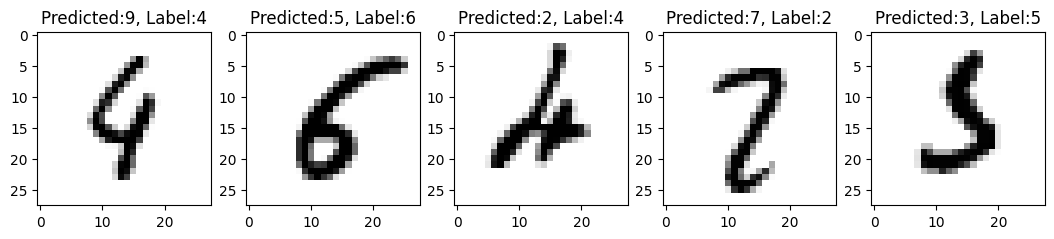

In [3]:
index = 0
# print('Examples of misclassified images {}-{}'.format(index, index+4))
plt.figure(figsize=(13,3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    idx = misclassified[i+index]
    digit = test_images[idx]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.title('Predicted:{}, Label:{}'.format(predicted[idx], test_labels[idx]), fontsize = 12)
plt.show()

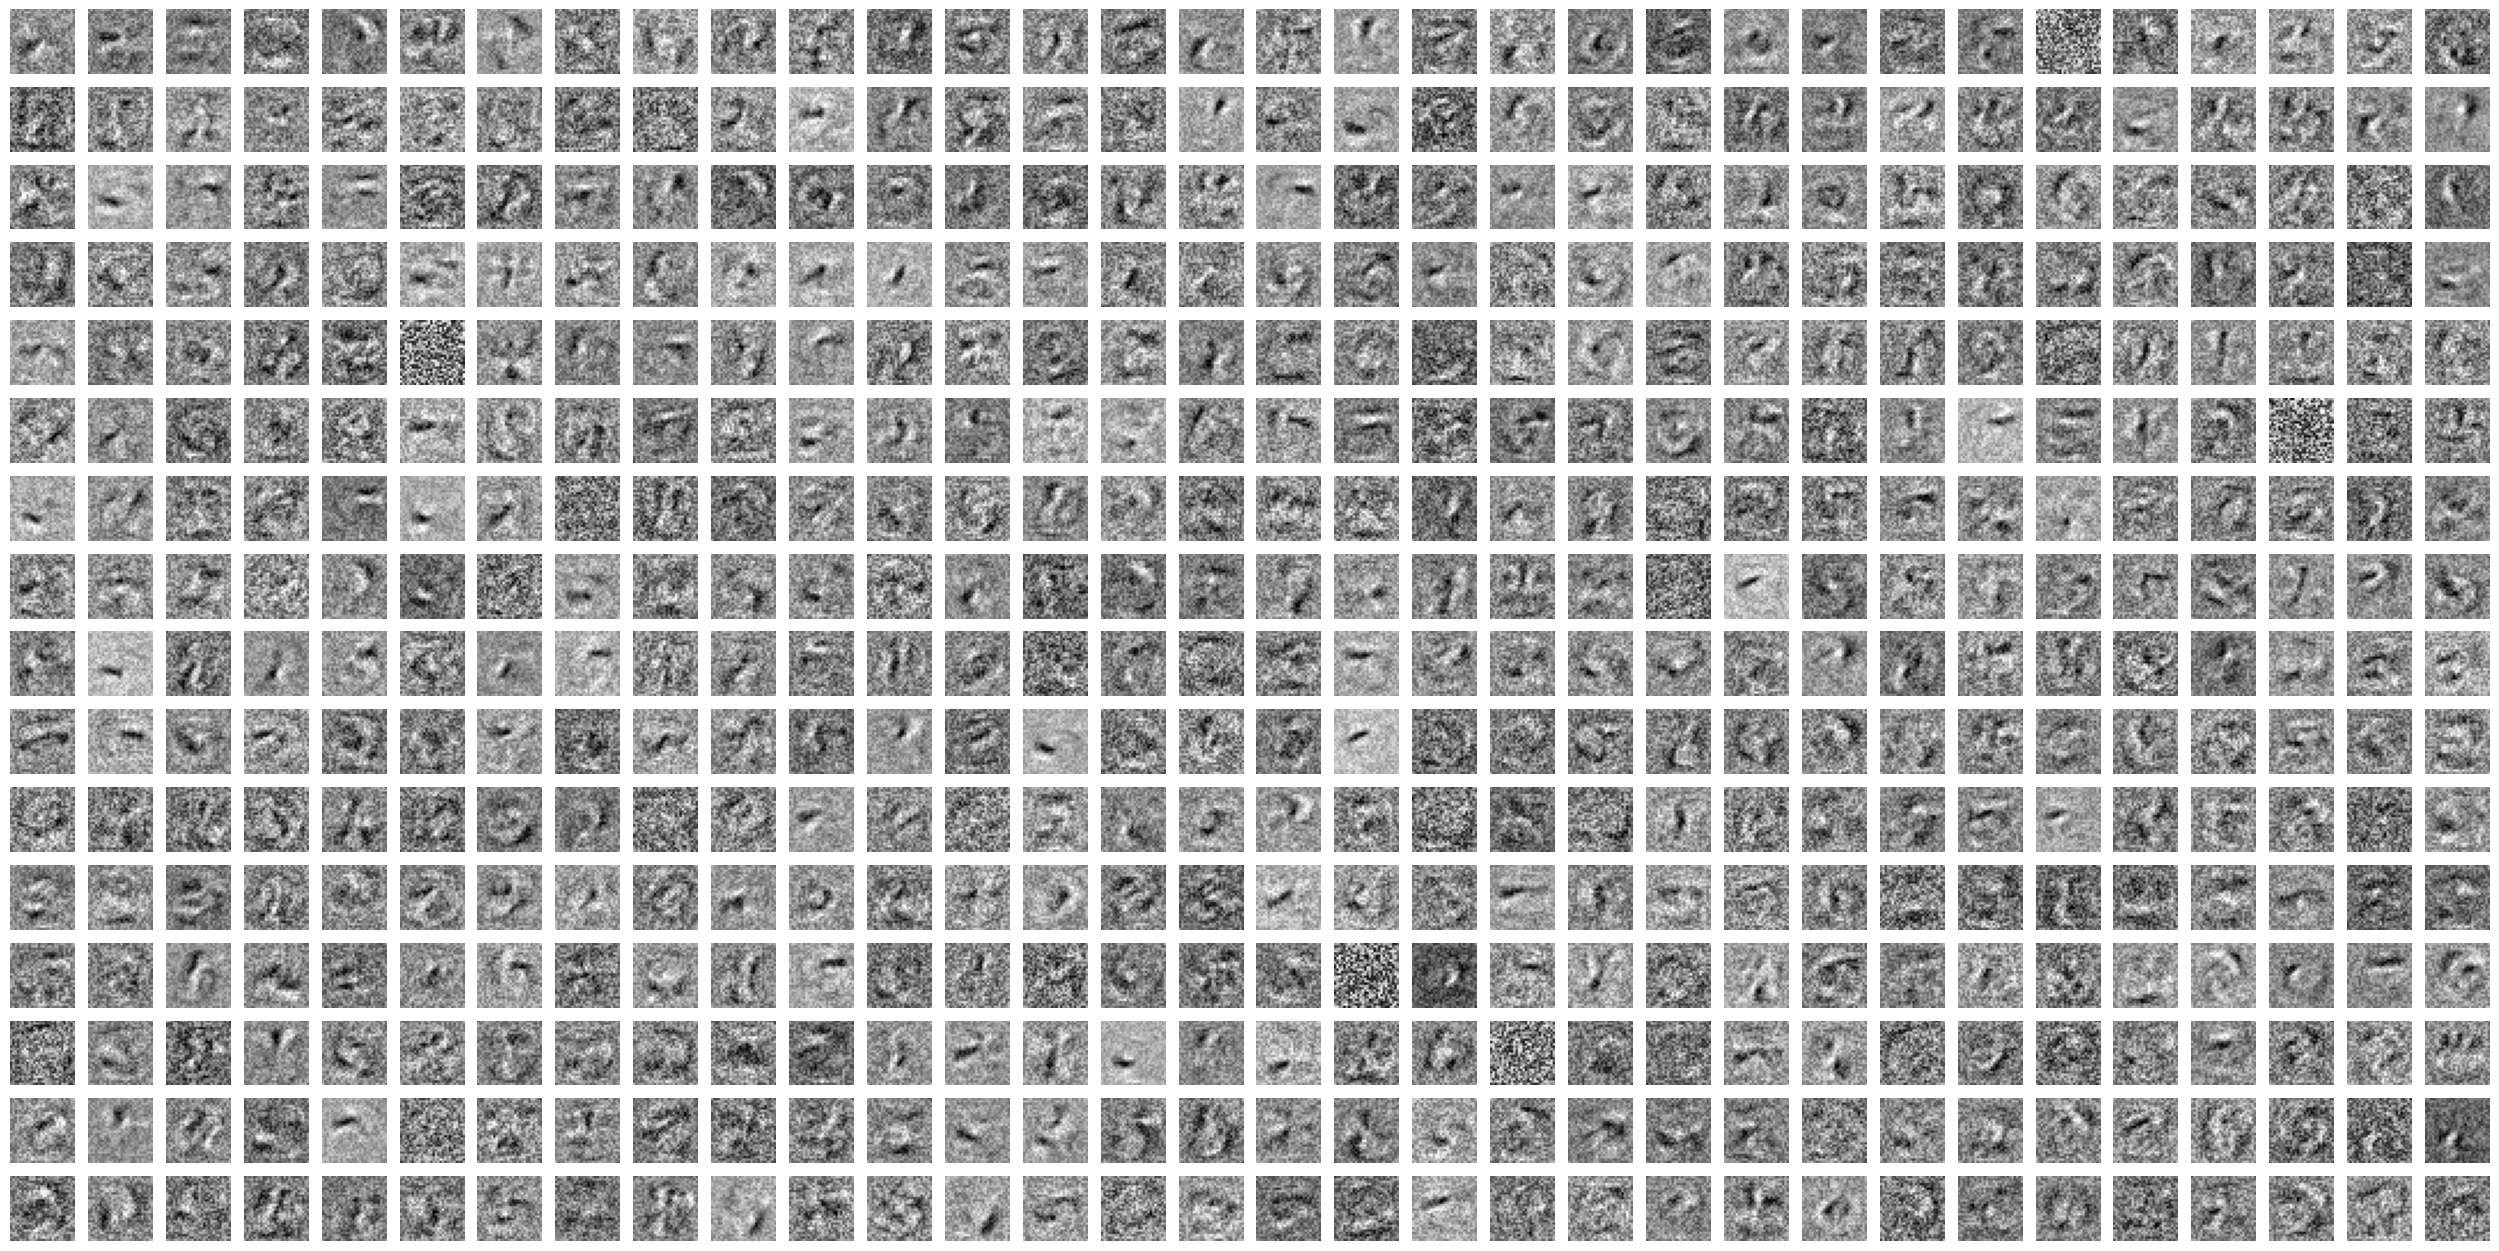

In [4]:
# Get the weights of all layers
weights = [layer.get_weights() for layer in model.layers]

# Reshape the weights into 28x28 images
weight = np.reshape(weights[0][0], (28, 28, 512))

# print('plot weights of the first layer as a heatmap')
fig, axs = plt.subplots(nrows=16, ncols=32, figsize=(32,16))
for i in range(16):
    for j in range(32):
        axs[i,j].imshow(weight[:,:,i*32+j], cmap='gray')
        axs[i,j].axis('off')
plt.show()

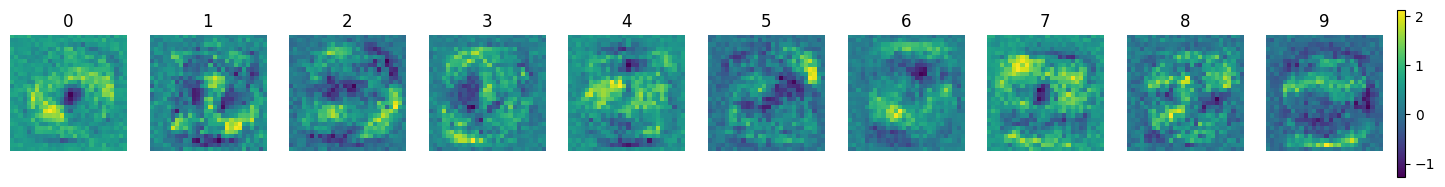

In [5]:
# print('plot aggregated weights of both layers as a heatmap')
# Get aggregated weights and reshape
weight = (weights[0][0] @ weights[1][0]).reshape(28, 28, -1)
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(18,10))
for i, ax in enumerate(axes):
    ax.set_title(i)
    im = ax.imshow(weight[:,:,i], cmap='viridis')
    ax.axis('off')
fig.colorbar(im, ax=axes, fraction=0.006, pad=0.01)
plt.show()